In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load wine quality dataset
#wine_data = pd.read_csv("/content/Inc_Exp_DataM.csv")
#print(wine_data)


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data= pd.read_csv(url,sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# Separate features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


In [ ]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
print(X)
#print(wine_data['quality'].unique())
# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[[ 1.72096961e-01 -8.17699008e-02  2.13280202e-01 ... -1.24692128e+00
  -3.49184257e-01 -1.39315246e+00]
 [-6.57501128e-01  2.15895632e-01  4.80011213e-02 ...  7.40028640e-01
   1.34184656e-03 -8.24275678e-01]
 [ 1.47575110e+00  1.74519434e-02  5.43838363e-01 ...  4.75101984e-01
  -4.36815783e-01 -3.36667007e-01]
 ...
 [-4.20473102e-01 -3.79435433e-01 -1.19159198e+00 ... -1.31315295e+00
  -2.61552731e-01 -9.05543789e-01]
 [-1.60561323e+00  1.16673788e-01 -2.82557040e-01 ...  1.00495530e+00
  -9.62604939e-01  1.85757201e+00]
 [-1.01304317e+00 -6.77100966e-01  3.78559282e-01 ...  4.75101984e-01
  -1.48839409e+00  1.04489089e+00]]


In [ ]:

print(X_test)
print(y_test)
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
perceptron = Perceptron(max_iter=10, tol=1e-3, random_state=42)


[[-1.01304317  0.11667379  0.6264779  ... -0.6508363   0.87765711
   0.36765663]
 [-1.72412724  2.49799805 -1.4395106  ...  0.077712    0.35186795
   2.18264446]
 [ 0.29061097 -0.28021359  0.46119882 ...  0.60756531 -0.52444731
   1.36996334]
 ...
 [-1.13155718 -0.18099175 -1.0263129  ...  0.60756531 -0.52444731
  -0.82427568]
 [ 0.76466702  0.11667379 -0.1999175  ... -0.71706797  0.43949948
  -0.9868119 ]
 [-0.18344508 -0.57787912  0.46119882 ...  2.06466192 -0.17392121
  -0.41793512]]
4656    7
3659    8
907     8
4352    5
3271    7
       ..
3207    6
1539    6
964     6
168     5
3661    6
Name: quality, Length: 980, dtype: int64


In [ ]:
# Initialize Perceptron Classifier
#perceptron = Perceptron()

# Train Perceptron Classifier
perceptron.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Perceptron(max_iter=10, random_state=42)

In [ ]:
# Predict wine quality for test set
y_pred = perceptron.predict(X_test)
print(y_pred)
# Print accuracy and classification report
print(f"Perceptron Classifier accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))





[6 7 7 6 7 5 5 6 6 6 6 5 7 6 6 6 7 6 6 6 6 7 5 6 8 6 5 8 6 6 6 6 6 6 6 7 6
 5 6 6 6 6 6 5 5 6 6 6 6 6 5 6 6 6 6 5 6 7 6 6 6 6 5 7 7 7 8 6 6 6 5 6 5 5
 6 6 6 7 8 6 6 6 6 5 7 6 6 6 6 6 6 6 6 7 6 7 6 6 5 7 6 6 6 6 6 6 6 6 6 8 6
 6 7 6 6 7 7 6 6 6 7 6 6 6 7 6 8 7 7 6 7 6 7 6 5 6 6 5 7 6 8 6 5 6 6 6 5 6
 6 6 8 6 6 8 7 5 7 6 5 6 6 5 6 6 6 6 5 6 6 6 5 6 7 6 7 6 6 6 6 5 6 6 5 6 6
 7 6 6 6 6 6 6 6 7 5 6 7 7 6 6 6 5 7 7 6 6 7 6 6 7 6 7 6 7 5 6 6 6 6 6 6 6
 6 7 7 6 6 7 6 5 6 6 7 7 6 7 7 6 6 6 6 5 7 6 8 5 6 6 6 5 6 7 6 6 6 6 6 6 7
 6 7 5 6 5 8 6 6 6 6 6 6 7 6 7 5 7 4 5 7 6 6 6 7 5 6 7 7 6 6 6 8 7 6 6 7 6
 6 7 7 6 5 6 7 6 7 6 6 6 6 5 6 6 7 6 7 7 6 7 5 7 6 6 7 6 4 6 6 6 8 6 7 7 6
 6 6 6 7 6 6 6 6 6 5 6 5 6 7 7 6 6 7 6 6 6 6 6 6 7 8 7 6 6 6 6 8 5 6 6 6 7
 5 6 6 6 6 6 6 5 6 6 6 5 6 6 6 5 5 6 6 6 5 6 6 6 5 6 5 7 6 6 5 8 6 7 6 5 6
 5 8 6 6 6 7 6 6 6 5 6 5 8 7 6 6 7 7 6 6 7 6 7 7 6 5 7 7 6 6 7 5 6 6 8 6 5
 6 6 7 6 6 6 6 6 6 6 7 6 5 7 5 5 5 7 6 6 8 7 6 6 7 7 5 6 7 6 5 6 6 6 6 6 5
 5 5 6 6 7 6 6 6 5 6 5 6 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


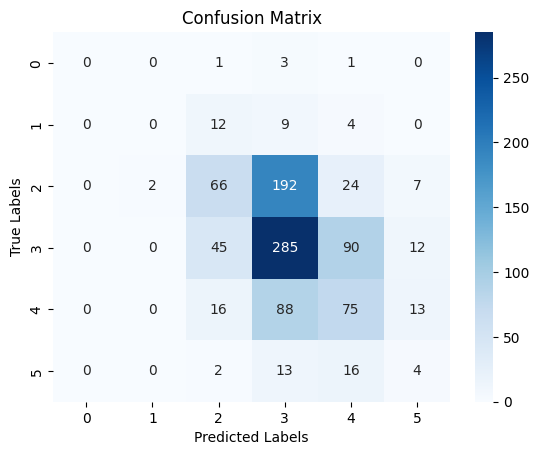

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


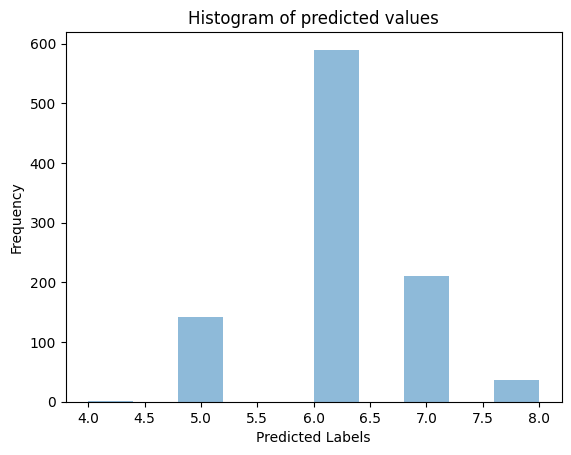

In [ ]:

# Plot histogram of predicted wine quality values
plt.hist(y_pred, alpha=0.5)
plt.xlabel("Predicted Labels")
plt.ylabel("Frequency")
plt.title("Histogram of predicted values")
plt.show()

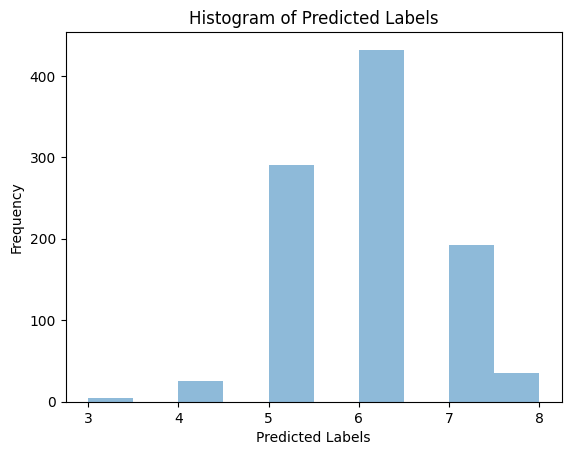

In [ ]:
plt.hist(y_test, alpha=0.5)
plt.xlabel("Predicted Labels")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Labels")
plt.show()
#----------------------------------------------using MLP
